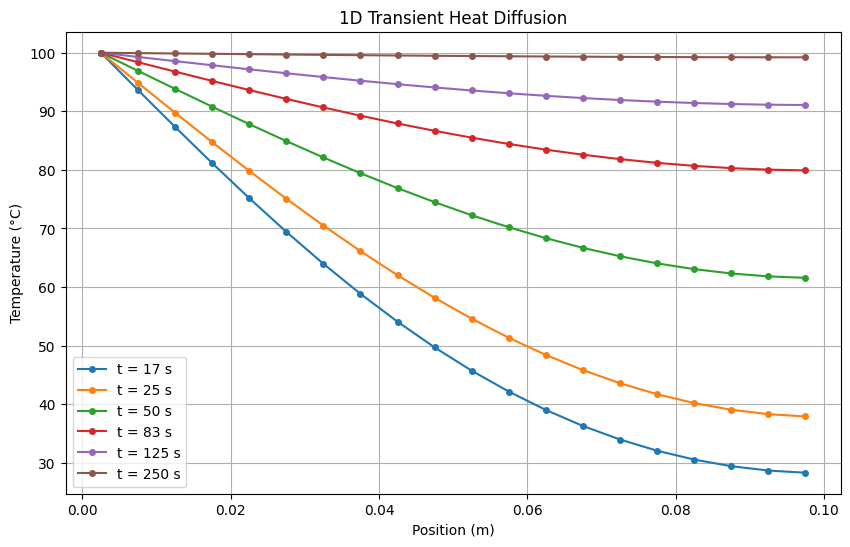

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# CASE SETUP
length = 0.1 # m
node_count = 20
delta_x = length / node_count
gamma_T = 7.5e-5 # m^2/s
T = np.full(node_count,20.0) # deg C

# BOUNDARIES AND CONSTANTS
T_BCW = 100.0 # deg C
q_BCE = 0 # W/m^2
alpha = gamma_T / (delta_x ** 2)
criterion = 0.05 #[0.05, 0.1, 0.5, 1.0]
delta_t = criterion* delta_x**2 / gamma_T
total_time = 250.0 # seconds
iterations = total_time / delta_t

# SAVING SETUP
save_iterations = [round(iterations/15), round(iterations/10), round(iterations/5), 
                    round(iterations/3), round(iterations/2), round(iterations)]
plot_times = [total_time/15, total_time/10, total_time/5, 
            total_time/3, total_time/2, total_time]

# LOOPING
result_list = []
for iters in range(0,round(iterations) + 1):
    T_old = T.copy()
    T[0] = T_BCW
    T[-1] = (1 - 2 * alpha * delta_t)*T_old[-1] + alpha * delta_t * (T_old[-2] + T_old[-1])
    T[1:-1] = (1 - 2 * alpha * delta_t)*T_old[1:-1] + alpha * delta_t * (T_old[0:-2] + T_old[2:])

    if iters in save_iterations:
        result_list.append(T.copy())

# PLOTTING
x_coords = np.linspace(delta_x / 2, length - delta_x / 2, node_count)
plt.figure(figsize=(10, 6))
for T_profile, time in zip(result_list, plot_times):
    plt.plot(x_coords, T_profile, label=f't = {time:.0f} s', marker='o', markersize=4)

plt.title('1D Transient Heat Diffusion')
plt.xlabel('Position (m)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()